### This script contains the following:

01. Importing Libraries
02. Importing Data
03. Data Wrangling
04. The Elbow Technique
05. K-Means Clustering
06. Exporting Data

# 01. Importing Libraries

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# Ensuring graphs are displayed in notebook w/out the need to 'call' them specifically

%matplotlib inline

# 02. Importing Data

In [3]:
# Project folder pathway

path = r'C:\Users\SD.DESKTOP-45BHU58\OneDrive\Desktop\CF\Section 6 - Advanced Analytics\Final Project'

In [4]:
path

'C:\\Users\\SD.DESKTOP-45BHU58\\OneDrive\\Desktop\\CF\\Section 6 - Advanced Analytics\\Final Project'

In [5]:
# Importing cleaned housing data

df = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'austin_housing_clean_4.csv'))

# 03. Data Wrangling

In [6]:
# Checking shape

df.shape

(15024, 45)

In [7]:
# Checking headers

pd.options.display.max_columns = None
df.head()

,Unnamed: 0,latitude,longitude,propertyTaxRate,hasAssociation,hasCooling,hasGarage,hasHeating,hasSpa,hasView,homeType,yearBuilt,price,numPriceChanges,saleDate,saleMonth,saleYear,latestPriceSource,numOfPhotos,numOfAccessibilityFeatures,numOfAppliances,numOfParkingFeatures,numOfPatioAndPorchFeatures,numOfSecurityFeatures,numOfWaterfrontFeatures,numOfWindowFeatures,numOfCommunityFeatures,lotSizeSqFt,livingAreaSqFt,numOfPrimarySchools,numOfElementarySchools,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,medianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,age,value,ageCategory,zipcode,zipcode_median
0,0,30.430632,-97.663078,1.98,True,True,True,True,False,False,Single Family,2012,305000,5,9/2/2019,9,2019,"Coldwell Banker United, Realtors - South Austin",39,0,5,2,1,3,0,1,0,6011,2601,1,0,1,1,1.266667,2.666667,1063,14,3.0,4,2,9,Below Median,<=10 Yrs,78660,289700.0
1,1,30.432672,-97.661697,1.98,True,True,True,True,False,False,Single Family,2013,295000,1,10/13/2020,10,2020,Agent Provided,29,0,1,2,0,0,0,0,0,6185,1768,1,0,1,1,1.400000,2.666667,1063,14,2.0,4,1,8,Below Median,<=10 Yrs,78660,289700.0
2,2,30.409748,-97.639771,1.98,True,True,False,True,False,False,Single Family,2018,256125,1,7/31/2019,7,2019,Agent Provided,2,0,4,1,0,1,0,0,0,7840,1478,0,2,1,1,1.200000,3.000000,1108,14,2.0,3,1,3,Below Median,<=10 Yrs,78660,289700.0
3,3,30.432112,-97.661659,1.98,True,True,True,True,False,False,Single Family,2013,240000,4,8/8/2018,8,2018,Agent Provided,9,0,0,2,0,0,0,0,0,6098,1678,1,0,1,1,1.400000,2.666667,1063,14,2.0,3,1,8,Below Median,<=10 Yrs,78660,289700.0
4,4,30.437368,-97.656860,1.98,True,True,False,True,False,False,Single Family,2002,239900,3,10/31/2018,10,2018,Agent Provided,27,0,0,1,0,0,0,0,0,6708,2132,1,0,1,1,1.133333,4.000000,1223,14,3.0,3,2,19,Below Median,10-20 Yrs,78660,289700.0


In [8]:
# Dropping 'Unnamed:0' column

df = df.drop(columns = ['Unnamed: 0'])

In [9]:
# Double checking headers

df.head()

,latitude,longitude,propertyTaxRate,hasAssociation,hasCooling,hasGarage,hasHeating,hasSpa,hasView,homeType,yearBuilt,price,numPriceChanges,saleDate,saleMonth,saleYear,latestPriceSource,numOfPhotos,numOfAccessibilityFeatures,numOfAppliances,numOfParkingFeatures,numOfPatioAndPorchFeatures,numOfSecurityFeatures,numOfWaterfrontFeatures,numOfWindowFeatures,numOfCommunityFeatures,lotSizeSqFt,livingAreaSqFt,numOfPrimarySchools,numOfElementarySchools,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,medianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,age,value,ageCategory,zipcode,zipcode_median
0,30.430632,-97.663078,1.98,True,True,True,True,False,False,Single Family,2012,305000,5,9/2/2019,9,2019,"Coldwell Banker United, Realtors - South Austin",39,0,5,2,1,3,0,1,0,6011,2601,1,0,1,1,1.266667,2.666667,1063,14,3.0,4,2,9,Below Median,<=10 Yrs,78660,289700.0
1,30.432672,-97.661697,1.98,True,True,True,True,False,False,Single Family,2013,295000,1,10/13/2020,10,2020,Agent Provided,29,0,1,2,0,0,0,0,0,6185,1768,1,0,1,1,1.400000,2.666667,1063,14,2.0,4,1,8,Below Median,<=10 Yrs,78660,289700.0
2,30.409748,-97.639771,1.98,True,True,False,True,False,False,Single Family,2018,256125,1,7/31/2019,7,2019,Agent Provided,2,0,4,1,0,1,0,0,0,7840,1478,0,2,1,1,1.200000,3.000000,1108,14,2.0,3,1,3,Below Median,<=10 Yrs,78660,289700.0
3,30.432112,-97.661659,1.98,True,True,True,True,False,False,Single Family,2013,240000,4,8/8/2018,8,2018,Agent Provided,9,0,0,2,0,0,0,0,0,6098,1678,1,0,1,1,1.400000,2.666667,1063,14,2.0,3,1,8,Below Median,<=10 Yrs,78660,289700.0
4,30.437368,-97.656860,1.98,True,True,False,True,False,False,Single Family,2002,239900,3,10/31/2018,10,2018,Agent Provided,27,0,0,1,0,0,0,0,0,6708,2132,1,0,1,1,1.133333,4.000000,1223,14,3.0,3,2,19,Below Median,10-20 Yrs,78660,289700.0


In [10]:
# Double checking shape

df.shape

(15024, 44)

#### Data cleaning was conducted in prior exercises

# 04. The Elbow Technique

In [11]:
# Creating a df with just numerical variables

df_k = df[['longitude', 'latitude', 'propertyTaxRate', 'price', 'numPriceChanges', 'saleMonth', 'saleYear', 'numOfPhotos', 'numOfAccessibilityFeatures', 'numOfAppliances', 'numOfParkingFeatures', 'numOfPatioAndPorchFeatures', 'numOfSecurityFeatures', 'numOfWaterfrontFeatures', 'numOfWindowFeatures', 'numOfCommunityFeatures', 'livingAreaSqFt', 'numOfPrimarySchools', 'numOfElementarySchools', 'numOfMiddleSchools', 'numOfHighSchools', 'avgSchoolDistance', 'avgSchoolRating', 'avgSchoolSize', 'medianStudentsPerTeacher', 'numOfBathrooms', 'numOfBedrooms', 'numOfStories', 'age', 'zipcode_median']]

In [12]:
# Checking headers

df_k.head()

,longitude,latitude,propertyTaxRate,price,numPriceChanges,saleMonth,saleYear,numOfPhotos,numOfAccessibilityFeatures,numOfAppliances,numOfParkingFeatures,numOfPatioAndPorchFeatures,numOfSecurityFeatures,numOfWaterfrontFeatures,numOfWindowFeatures,numOfCommunityFeatures,livingAreaSqFt,numOfPrimarySchools,numOfElementarySchools,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,medianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,age,zipcode_median
0,-97.663078,30.430632,1.98,305000,5,9,2019,39,0,5,2,1,3,0,1,0,2601,1,0,1,1,1.266667,2.666667,1063,14,3.0,4,2,9,289700.0
1,-97.661697,30.432672,1.98,295000,1,10,2020,29,0,1,2,0,0,0,0,0,1768,1,0,1,1,1.400000,2.666667,1063,14,2.0,4,1,8,289700.0
2,-97.639771,30.409748,1.98,256125,1,7,2019,2,0,4,1,0,1,0,0,0,1478,0,2,1,1,1.200000,3.000000,1108,14,2.0,3,1,3,289700.0
3,-97.661659,30.432112,1.98,240000,4,8,2018,9,0,0,2,0,0,0,0,0,1678,1,0,1,1,1.400000,2.666667,1063,14,2.0,3,1,8,289700.0
4,-97.656860,30.437368,1.98,239900,3,10,2018,27,0,0,1,0,0,0,0,0,2132,1,0,1,1,1.133333,4.000000,1223,14,3.0,3,2,19,289700.0


In [13]:
# Defining the range of potential clusters in the data

num_cl = range(1, 10)

# Defining k-means clusters in the range assigned above

kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [14]:
# Creating a score that represents a rate of variation for the given cluster option

score = [kmeans[i].fit(df_k).score(df_k) for i in range(len(kmeans))]

In [15]:
# Checking score

score

[-3430341305764844.5,
 -1850912044113285.5,
 -1186068901052813.0,
 -840236127043498.4,
 -588765846808128.0,
 -469060774129652.6,
 -401782839113964.94,
 -350787435944838.6,
 -311892839861796.4]

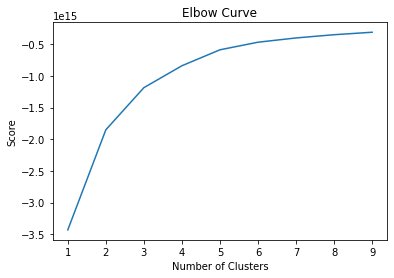

In [16]:
# Plotting the elbow curve using PyLab

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

##### The curve shows that the optimal count for clusters is 3. There is a large jump from 2 to 3 on the x-axis and the curve starts to flatten afterward.

# 05. K-Means Clustering

In [17]:
# Creating the k-means object

kmeans = KMeans(n_clusters = 3)

In [18]:
# Fitting the k-means object to the data

kmeans.fit(df_k)

KMeans(n_clusters=3)

In [19]:
# Addings 'clusters' column to see which cluster each data point falls under

df_k['clusters'] = kmeans.fit_predict(df_k)

C:\Users\SD.DESKTOP-45BHU58\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [20]:
# Double checking columns

df_k.head()

,longitude,latitude,propertyTaxRate,price,numPriceChanges,saleMonth,saleYear,numOfPhotos,numOfAccessibilityFeatures,numOfAppliances,numOfParkingFeatures,numOfPatioAndPorchFeatures,numOfSecurityFeatures,numOfWaterfrontFeatures,numOfWindowFeatures,numOfCommunityFeatures,livingAreaSqFt,numOfPrimarySchools,numOfElementarySchools,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,medianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,age,zipcode_median,clusters
0,-97.663078,30.430632,1.98,305000,5,9,2019,39,0,5,2,1,3,0,1,0,2601,1,0,1,1,1.266667,2.666667,1063,14,3.0,4,2,9,289700.0,0
1,-97.661697,30.432672,1.98,295000,1,10,2020,29,0,1,2,0,0,0,0,0,1768,1,0,1,1,1.400000,2.666667,1063,14,2.0,4,1,8,289700.0,0
2,-97.639771,30.409748,1.98,256125,1,7,2019,2,0,4,1,0,1,0,0,0,1478,0,2,1,1,1.200000,3.000000,1108,14,2.0,3,1,3,289700.0,0
3,-97.661659,30.432112,1.98,240000,4,8,2018,9,0,0,2,0,0,0,0,0,1678,1,0,1,1,1.400000,2.666667,1063,14,2.0,3,1,8,289700.0,0
4,-97.656860,30.437368,1.98,239900,3,10,2018,27,0,0,1,0,0,0,0,0,2132,1,0,1,1,1.133333,4.000000,1223,14,3.0,3,2,19,289700.0,0


In [21]:
# Checking 'clusters' values - total values should be 15,024

df_k['clusters'].value_counts()

0    12272
1     2571
2      181
Name: clusters, dtype: int64

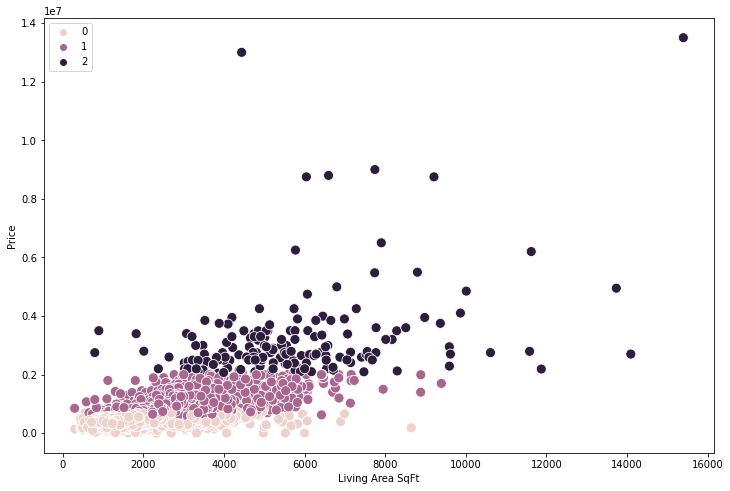

In [22]:
# Plotting the clusters for the 'livingAreaSqFt' and 'price' variables

# 'hue' takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm
# 's' represents the size of the points in the plot

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_k['livingAreaSqFt'], y=df_k['price'], hue=kmeans.labels_, s=100)

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Living Area SqFt') 
plt.ylabel('Price')
plt.show()

The clusters can be interpreted as the following:

● pink (0): homes with lower living area sqft and lower prices  
● light purple (1): homes with lower living area sqft and medium prices (prices higher than cluster 0)  
● dark purple (2): homes with higher living area sqft and higher prices  

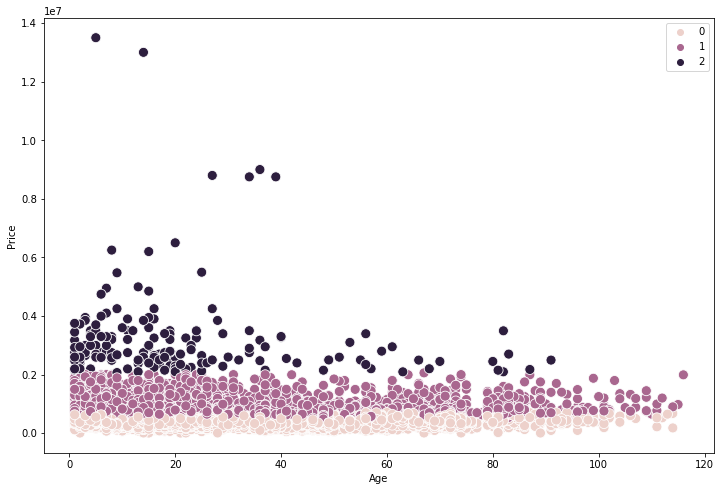

In [23]:
# Plotting the clusters for the'age' and 'price' variables

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_k['age'], y=df_k['price'], hue=kmeans.labels_, s=100)

ax.grid(False)
plt.xlabel('Age') 
plt.ylabel('Price')
plt.show()

There is no visible linear connection here. However, it should be noted that cluster 0 and 1 (pink and light purple) have low to medium priced homes with a wide age range, while cluster 2 (dark purple) are mainly higher-priced homes within 25 years of age.

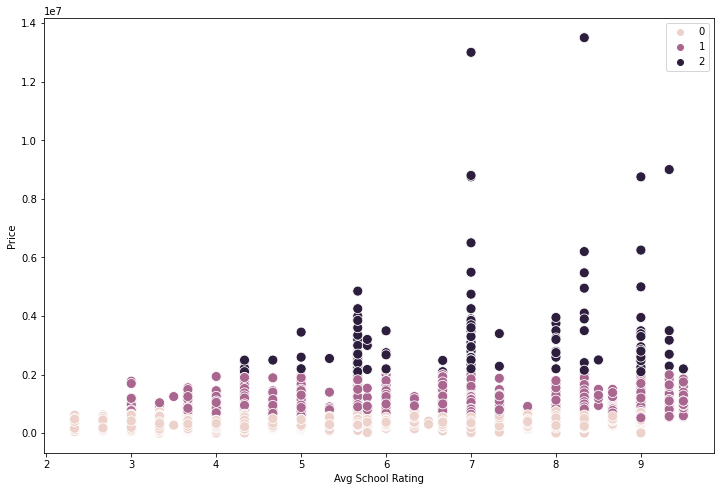

In [24]:
# Plotting the clusters for the'avgSchoolRating' and 'price' variables

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_k['avgSchoolRating'], y=df_k['price'], hue=kmeans.labels_, s=100)

ax.grid(False)
plt.xlabel('Avg School Rating') 
plt.ylabel('Price')
plt.show()

This is another example where there is a non-linear relationship but valuable insights can be drawn. The avg school rating below 3 is exclusively made up of cluster 0 while the rating 9+ is made almost exclusively of cluster 1 and 2.

In [25]:
# Adding column of cluster color values based on numeric value

df_k.loc[df_k['clusters'] == 2, 'cluster'] = 'dark purple'
df_k.loc[df_k['clusters'] == 1, 'cluster'] = 'light purple'
df_k.loc[df_k['clusters'] == 0, 'cluster'] = 'pink'

C:\Users\SD.DESKTOP-45BHU58\anaconda3\lib\site-packages\pandas\core\indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\SD.DESKTOP-45BHU58\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [26]:
df_k.groupby('cluster').agg({'livingAreaSqFt':['mean', 'median'], 
                         'age':['mean', 'median'], 
                         'avgSchoolRating':['mean', 'median'],
                          'price':['mean', 'median']})

livingAreaSqFt                age        avgSchoolRating  \
                       mean  median       mean median            mean   
cluster                                                                 
dark purple     5668.254144  5225.0  20.767956   16.0        7.096700   
light purple    3058.602878  2927.0  33.336834   25.0        6.880552   
pink            1964.579775  1819.0  32.299951   29.0        5.532104   

                               price             
                median          mean     median  
cluster                                          
dark purple   7.000000  3.190450e+06  2750000.0  
light purple  7.000000  9.468286e+05   839000.0  
pink          5.333333  3.806431e+05   370000.0

#### Overall, the cluster analysis was helpful in explaining relationships that the linear regression was not able to capture. The following patterns were uncovered:

● light purple - medium living area sqft (more than pink, less than dark purple), older home, higher school rating, medium-priced 

● dark purple - higher living area sqft, younger home, higher school rating, higher-priced

● pink - lower living area sqft, older home, lower school rating, lower-priced

#### While this analysis is limited, some possible conclusions can be drawn:

Homes within the dark and light purple and are likely near quality schools. Good schools tend to have higher demand, which can raise the home value. They could also be in more well-to-do areas which means the schools have the resources to provide a quality school experience, as reflected by the higher school rating scores.  

These clusters most likely have more employment opportunities through universities, research centers, etc. compared to the pink cluster. It's possible there are a good amount of homes in the pink cluster that are in more remote or less-settled areas. They may not have as many amenities and businesses as a result. There could also be older homes that are not as maintained or have up-to-date features.

# 06. Exporting Data

In [27]:
# Assigning aggregate values to a dataframe

df_k_aggregates = df_k.groupby('cluster').agg({'livingAreaSqFt':['mean', 'median'], 
                         'age':['mean', 'median'], 
                         'avgSchoolRating':['mean', 'median'],
                          'price':['mean', 'median']})

In [28]:
# Double checking dataframe

df_k_aggregates

livingAreaSqFt                age        avgSchoolRating  \
                       mean  median       mean median            mean   
cluster                                                                 
dark purple     5668.254144  5225.0  20.767956   16.0        7.096700   
light purple    3058.602878  2927.0  33.336834   25.0        6.880552   
pink            1964.579775  1819.0  32.299951   29.0        5.532104   

                               price             
                median          mean     median  
cluster                                          
dark purple   7.000000  3.190450e+06  2750000.0  
light purple  7.000000  9.468286e+05   839000.0  
pink          5.333333  3.806431e+05   370000.0

In [29]:
# Exporting df_k_aggregates dataframe

df_k_aggregates.to_csv(os.path.join(path, 'Data', 'Prepared Data', 'austin_housing_cluster_aggregates.csv'))

In [30]:
# Exporting subset dataframe

df_k.to_csv(os.path.join(path, 'Data', 'Prepared Data', 'austin_housing_clustering.csv'))